<a href="https://colab.research.google.com/github/MarceloClaro/SIMILARIDADE-E-DETERMINA-O-DA-COR-DO-SOLO-/blob/master/determinarcor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install colour-science

In [0]:
import os
from collections import Counter
import colour
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from PIL import ImageColor

In [0]:
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    # hex = f"#{rgb[0]}{}{}"
    return hex

In [12]:
rgb = [1, 2, 3]
hex = ["#"]
[hex.append(f"{c:}") for c in rgb]
''.join(hex)

'#123'

In [0]:
PATH = './download.jpg'
WIDTH = 128
HEIGHT = 128
CLUSTERS = 1


Loaded JPEG image. Size: 11.85 KB. Dimensions: ((325, 155))


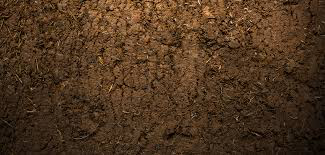

In [14]:
image = Image.open(PATH)

image.size

print("Loaded {f} image. Size: {s:.2f} KB. Dimensions: ({d})".format(
    f=image.format, s=os.path.getsize(PATH)/1024, d=image.size))

image

In [0]:
def calculate_new_size(image):
    if image.width >= image.height:
        wpercent = (WIDTH / float(image.width))
        hsize = int((float(image.height) * float(wpercent)))
        new_width, new_height = WIDTH, hsize
    else:
        hpercent = (HEIGHT / float(image.height))
        wsize = int((float(image.width) * float(hpercent)))
        new_width, new_height = wsize, HEIGHT
        
    image.resize((new_width, new_height), Image.ANTIALIAS)
    return image, new_width, new_height


New dimensions: 128x61


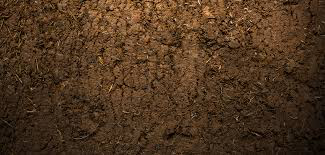

In [16]:
new_image, new_width, new_height = calculate_new_size(image)
print(f"New dimensions: {new_width}x{new_height}")
img_array = np.array(new_image)
img_vector = img_array.reshape((img_array.shape[0] * img_array.shape[1], 3))
new_image

In [17]:
model = KMeans(n_clusters=CLUSTERS)
labels = model.fit_predict(img_vector)
label_counts = Counter(labels)
model.cluster_centers_

array([[ 79.06066501,  54.36730521,  32.5208139 ]])

In [18]:
total_count = sum(label_counts.values())
total_count

50375

In [19]:
hex_colors = [rgb2hex(center) for center in model.cluster_centers_]
hex_colors

['#4f3620']

In [20]:
list(zip(hex_colors, list(label_counts.values())))


[('#4f3620', 50375)]

In [21]:
plt.figure(figsize=(14, 8))

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

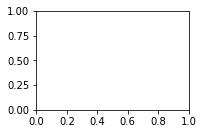

In [22]:
plt.subplot(221)

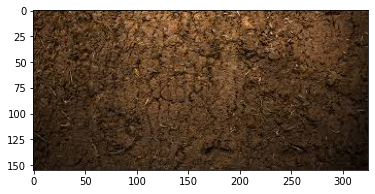

In [23]:
plt.imshow(image)

(0.0, 1.0, 0.0, 1.0)

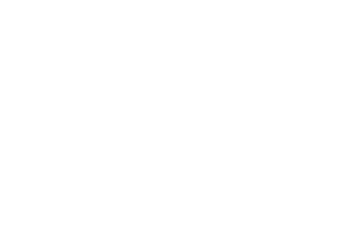

In [24]:
plt.axis('off')

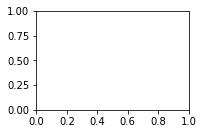

In [25]:
plt.subplot(222)

([<matplotlib.patches.Wedge at 0x7fc01a49c240>],
 [Text(-2.0206672185931328e-16, -1.1, '#4f3620')],
 [Text(-1.1021821192326178e-16, -0.6, '100.0%')])

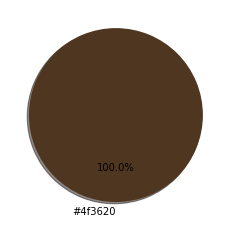

In [26]:
plt.pie(label_counts.values(), labels=hex_colors, colors=[color / 255 for color in model.cluster_centers_],
        autopct='%1.1f%%',
        shadow=True, startangle=90)

(-0.055000000000000007,
 0.055000000000000007,
 -0.055000000000000007,
 0.055000000000000007)

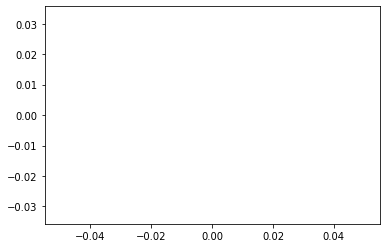

In [27]:
plt.axis('equal')

Text(0.5, 1.0, 'CORES DO SOLO')

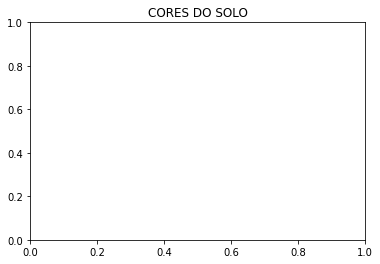

In [28]:
plt.title('CORES DO SOLO')

In [0]:
plt.show()

ENCONTREI A FUNÇÃO PARA TRANSFORMAR RGB PARA MUNSELL

In [31]:
import colour

C = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['C']

RGB = (0.96820063, 0.74966853, 0.60617991)

print(colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(RGB, C))))

4.2YR 8.1/5.3
